## <center><b>Lab 9 - Dense Neural Network</b></center>
<center>Done by: Aardran Premakumar <br> 8844491</center>

In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
import numpy as np
from sklearn.metrics import confusion_matrix

### Loading and Exploring Dataset

In [2]:
# loading the dataset into training and testing sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# info about the dataset
print("Number of training images: ", len(X_train))
print("Number of testing images: ", len(X_test))
print("Shape of each image: ", X_train[0].shape)
print(f'Unique labels: {set(y_train)}')

Number of training images:  60000
Number of testing images:  10000
Shape of each image:  (28, 28)
Unique labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


### Configuring and Training dense neural network with 3 hyperparameters

In [4]:
# configuring the three hyperparameters
config = [ {'activation' : 'relu','learning_rate': 0.001, 'layer_num': 1, 'node_num': 32},
          {'activation' : 'tanh','learning_rate': 0.001, 'layer_num': 2, 'node_num': 64},
          {'activation' : 'sigmoid','learning_rate': 0.001, 'layer_num': 3, 'node_num': 128}]

In [5]:
# training the model as dense neural network
def create_model(learning_rate, layer_num, node_num, activation):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    for i in range(layer_num):
        model.add(Dense(node_num, activation = activation))
    model.add(Dense(10, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [6]:
result = [] # list to store the accuracy of each model configuration

# evaluating the accuracy of the each model configuration
for c in config:
    model = create_model(**c)
    model.fit(X_train, y_train, epochs=5)
    test_loss, test_acc = model.evaluate(X_test, y_test)
    result.append((c, test_acc))
    print("Configurations: ", c)
    print(f'Test accuracy: {test_acc}')


Epoch 1/5
1875/1875 [==============================] - 2s 995us/step - loss: 2.3734 - accuracy: 0.4614
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1373 - accuracy: 0.5553
Epoch 3/5
1875/1875 [==============================] - 2s 954us/step - loss: 0.8775 - accuracy: 0.6502
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7766 - accuracy: 0.6866
Epoch 5/5
313/313 [==============================] - 0s 824us/step - loss: 0.6933 - accuracy: 0.7236
Configurations:  {'activation': 'relu', 'learning_rate': 0.001, 'layer_num': 1, 'node_num': 32}
Test accuracy: 0.7235999703407288
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0539 - accuracy: 0.5928
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9679 - accuracy: 0.6161
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9085 - accuracy: 0.6373
Epoch 4/5
1875/1875 [==============================] - 2s 

### Best Configuration and it's accuracy, confusion matrix, and examples of incorrect classification

In [7]:
# finding the best configuration
best_config, best_acc = max(result, key=lambda x: x[1])
print(f'Best config: {best_config}, best accuracy: {best_acc}')

Best config: {'activation': 'relu', 'learning_rate': 0.001, 'layer_num': 1, 'node_num': 32}, best accuracy: 0.7235999703407288


In [8]:
# training the best model
best_model = create_model(**best_config)
best_model.fit(X_train, y_train, epochs=5)
pred = best_model.predict(X_test)

# finding the confusion matrix
cm = confusion_matrix(y_test, np.argmax(pred, axis=1))

print("Accuracy: ", best_acc)
print("\nConfusion Matrix\n",cm)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 2.5389 - accuracy: 0.4812
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2160 - accuracy: 0.5811
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9397 - accuracy: 0.6441
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7990 - accuracy: 0.6970
Epoch 5/5
313/313 [==============================] - 0s 614us/step
Accuracy:  0.7235999703407288

Confusion Matrix
 [[686   5  31  82   3   0 184   0   9   0]
 [  0 953  11  31   1   0   2   0   2   0]
 [ 10  14 910   9   3   0  48   0   6   0]
 [ 16  19  48 862  17   0  35   0   3   0]
 [  0   9 896  56  22   1  12   0   4   0]
 [  0   0  16   0   1 860   1  61  19  42]
 [127   2 605  38   8   0 203   0  17   0]
 [  0   0   2   0   0  28   0 903   0  67]
 [  1   1  67   7   2   2   8   3 909   0]
 [  0   0  13   0   0  10   0  34   1 942]]


1/1 [==============================] - 0s 19ms/step


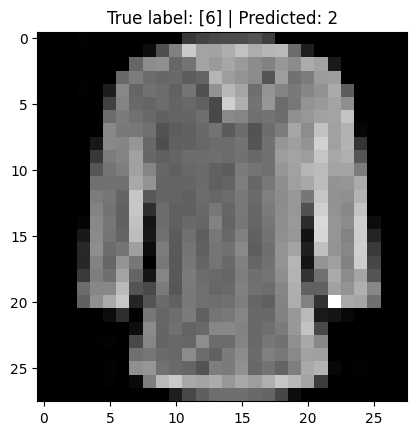

1/1 [==============================] - 0s 17ms/step


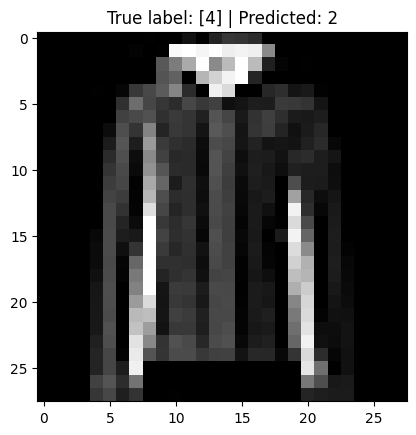

1/1 [==============================] - 0s 17ms/step


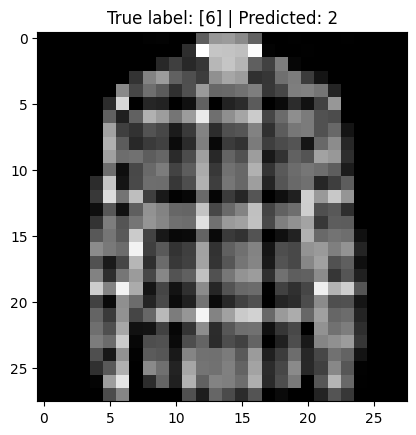

1/1 [==============================] - 0s 29ms/step


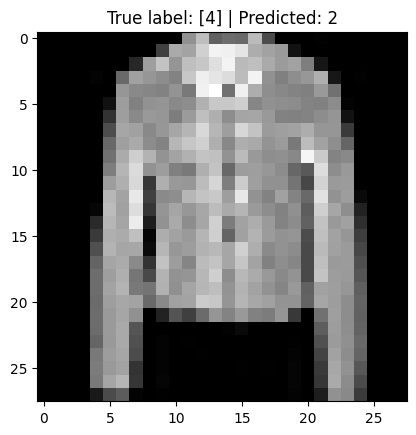

1/1 [==============================] - 0s 20ms/step


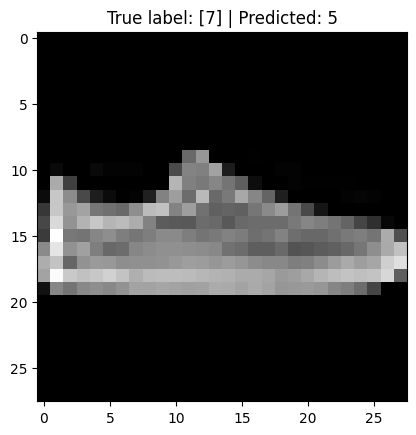

In [9]:
# finding incorrect predictions
incorrect_indices = tf.where(tf.not_equal(y_test, np.argmax(model.predict(X_test), axis=1)))
incorrect_images = X_test[incorrect_indices]
incorrect_labels = y_test[incorrect_indices]

# plotting the incorrect predictions
for i in range(5):
    image = incorrect_images[i].reshape((1, 28, 28))  # Reshape the image data
    plt.imshow(image[0], cmap='gray')
    plt.title(f"True label: {incorrect_labels[i]} | Predicted: {np.argmax(model.predict(image))}")
    plt.show()